Import packages

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Funciones soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("..")
import src.soporte_eda as se


# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Import data

In [2]:
country = pd.read_csv("../datos/country.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


EDA simple

In [3]:
se.exploracion_dataframe(country)

El número de datos es 167 y el de columnas es 10

 ..................... 

Las primeras filas del dataframe son:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090



 ..................... 

Los tipos de las columnas y sus valores únicos son:


,tipo_dato,conteo
country,object,167
child_mort,float64,139
exports,float64,147
health,float64,147
imports,float64,151
income,int64,156
inflation,float64,156
life_expec,float64,127
total_fer,float64,138
gdpp,int64,157



 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Comprobamos que no haya valores con una sola variable:

 ..................... 

Comprobamos una representación mínima para valores numéricos:

 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene 167 valores únicos, de los cuales los primeros son:


,count,pct
country,,
Afghanistan,1,0.6
Morocco,1,0.6
Myanmar,1,0.6
Namibia,1,0.6
Nepal,1,0.6


Asumimos que no hay duplicados

EDA interacciones

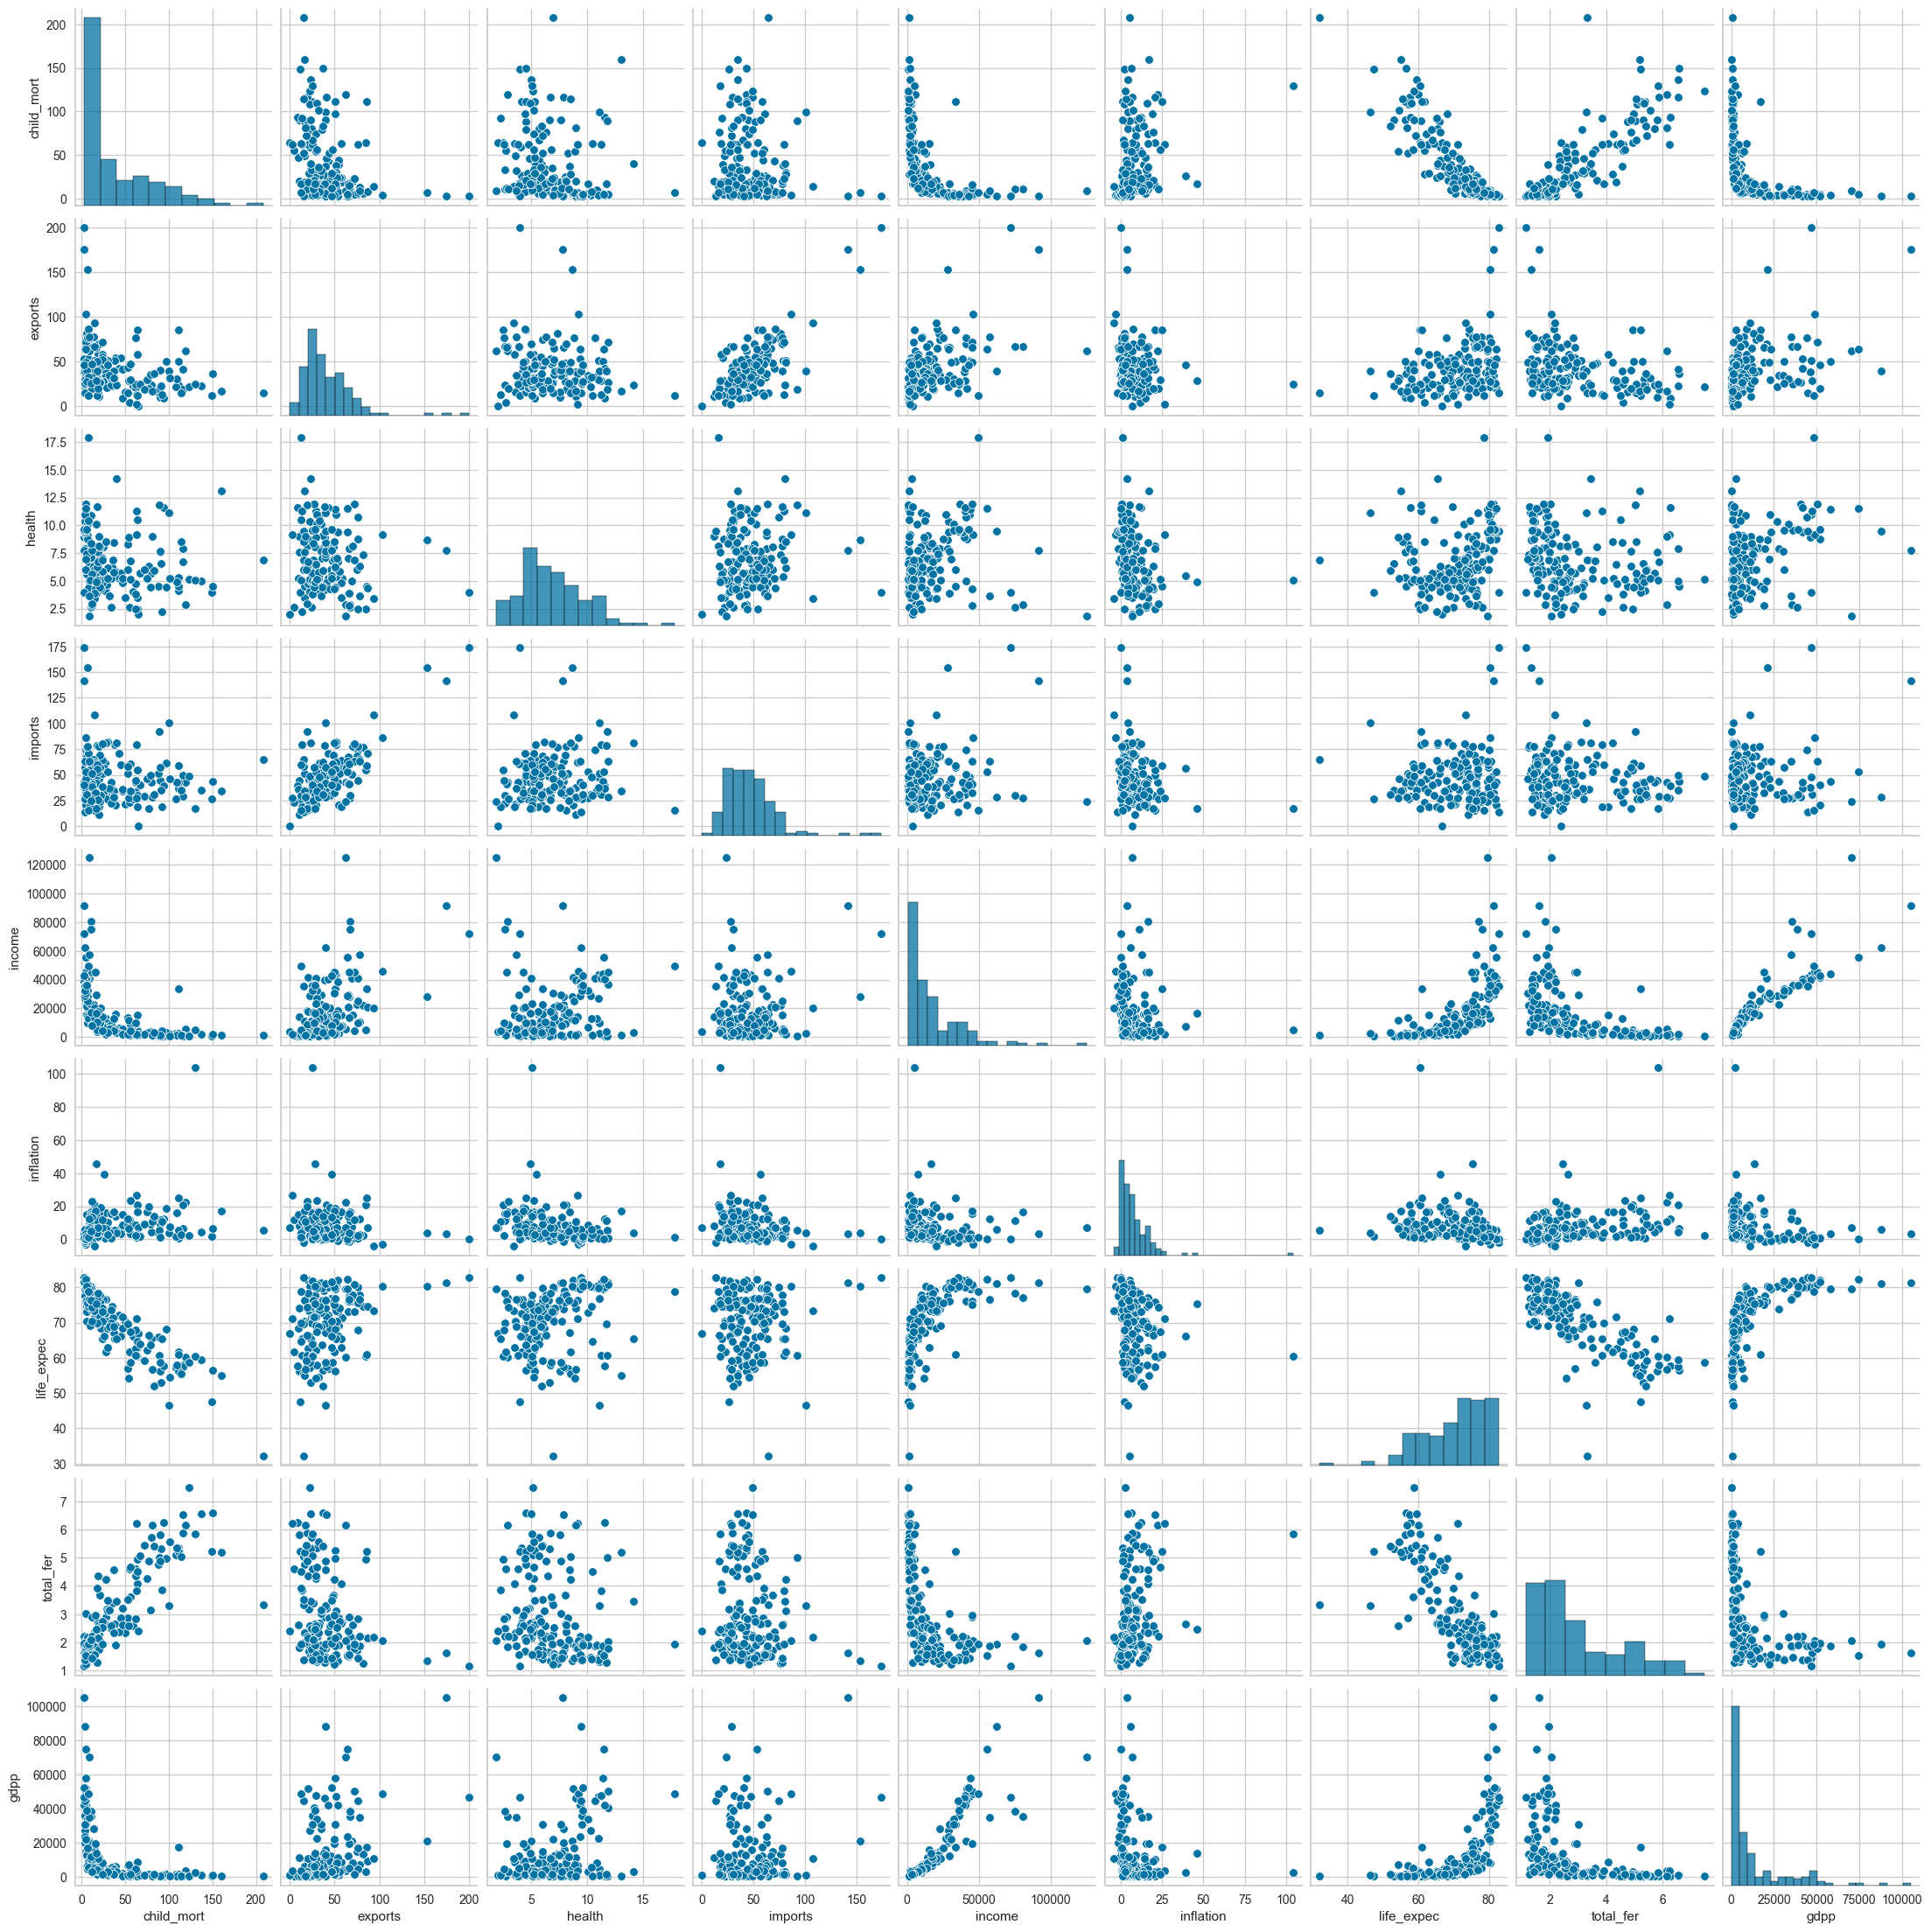

In [4]:
sns.pairplot(country)

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Top countries per KPI

In [6]:
for column in country.select_dtypes(np.number).columns:
    print("\nTop countries per KPI:")
    display(country.groupby("country")[[column]].mean().sort_values(column,ascending=False)[:5])

    print("Bottom countries per KPI:")
    display(country.groupby("country")[[column]].mean().sort_values(column)[:5])
    print("----------------------------------------------------")


Top countries per KPI:


,child_mort
country,
Haiti,208.0
Sierra Leone,160.0
Chad,150.0
Central African Republic,149.0
Mali,137.0


Bottom countries per KPI:


,child_mort
country,
Iceland,2.6
Luxembourg,2.8
Singapore,2.8
Finland,3.0
Sweden,3.0


----------------------------------------------------

Top countries per KPI:


,exports
country,
Singapore,200.0
Luxembourg,175.0
Malta,153.0
Ireland,103.0
Seychelles,93.8


Bottom countries per KPI:


,exports
country,
Myanmar,0.109
Timor-Leste,2.200
Eritrea,4.790
Burundi,8.920
Nepal,9.580


----------------------------------------------------

Top countries per KPI:


,health
country,
United States,17.9
"Micronesia, Fed. Sts.",14.2
Sierra Leone,13.1
Netherlands,11.9
France,11.9


Bottom countries per KPI:


,health
country,
Qatar,1.81
Myanmar,1.97
Pakistan,2.20
"Congo, Rep.",2.46
Turkmenistan,2.50


----------------------------------------------------

Top countries per KPI:


,imports
country,
Singapore,174.0
Malta,154.0
Luxembourg,142.0
Seychelles,108.0
Lesotho,101.0


Bottom countries per KPI:


,imports
country,
Myanmar,0.0659
Brazil,11.8000
Japan,13.6000
United States,15.8000
Argentina,16.0000


----------------------------------------------------

Top countries per KPI:


,income
country,
Qatar,125000.0
Luxembourg,91700.0
Brunei,80600.0
Kuwait,75200.0
Singapore,72100.0


Bottom countries per KPI:


,income
country,
"Congo, Dem. Rep.",609.0
Liberia,700.0
Burundi,764.0
Niger,814.0
Central African Republic,888.0


----------------------------------------------------

Top countries per KPI:


,inflation
country,
Nigeria,104.0
Venezuela,45.9
Mongolia,39.2
Timor-Leste,26.5
Equatorial Guinea,24.9


Bottom countries per KPI:


,inflation
country,
Seychelles,-4.210
Ireland,-3.220
Japan,-1.900
Czech Republic,-1.430
Slovenia,-0.987


----------------------------------------------------

Top countries per KPI:


,life_expec
country,
Japan,82.8
Singapore,82.7
Switzerland,82.2
Iceland,82.0
Australia,82.0


Bottom countries per KPI:


,life_expec
country,
Haiti,32.1
Lesotho,46.5
Central African Republic,47.5
Zambia,52.0
Malawi,53.1


----------------------------------------------------

Top countries per KPI:


,total_fer
country,
Niger,7.49
Chad,6.59
Mali,6.55
"Congo, Dem. Rep.",6.54
Burundi,6.26


Bottom countries per KPI:


,total_fer
country,
Singapore,1.15
South Korea,1.23
Hungary,1.25
Moldova,1.27
Bosnia and Herzegovina,1.31


----------------------------------------------------

Top countries per KPI:


,gdpp
country,
Luxembourg,105000.0
Norway,87800.0
Switzerland,74600.0
Qatar,70300.0
Denmark,58000.0


Bottom countries per KPI:


,gdpp
country,
Burundi,231.0
Liberia,327.0
"Congo, Dem. Rep.",334.0
Niger,348.0
Sierra Leone,399.0


----------------------------------------------------


Feature encoding - No necesario

Outliers

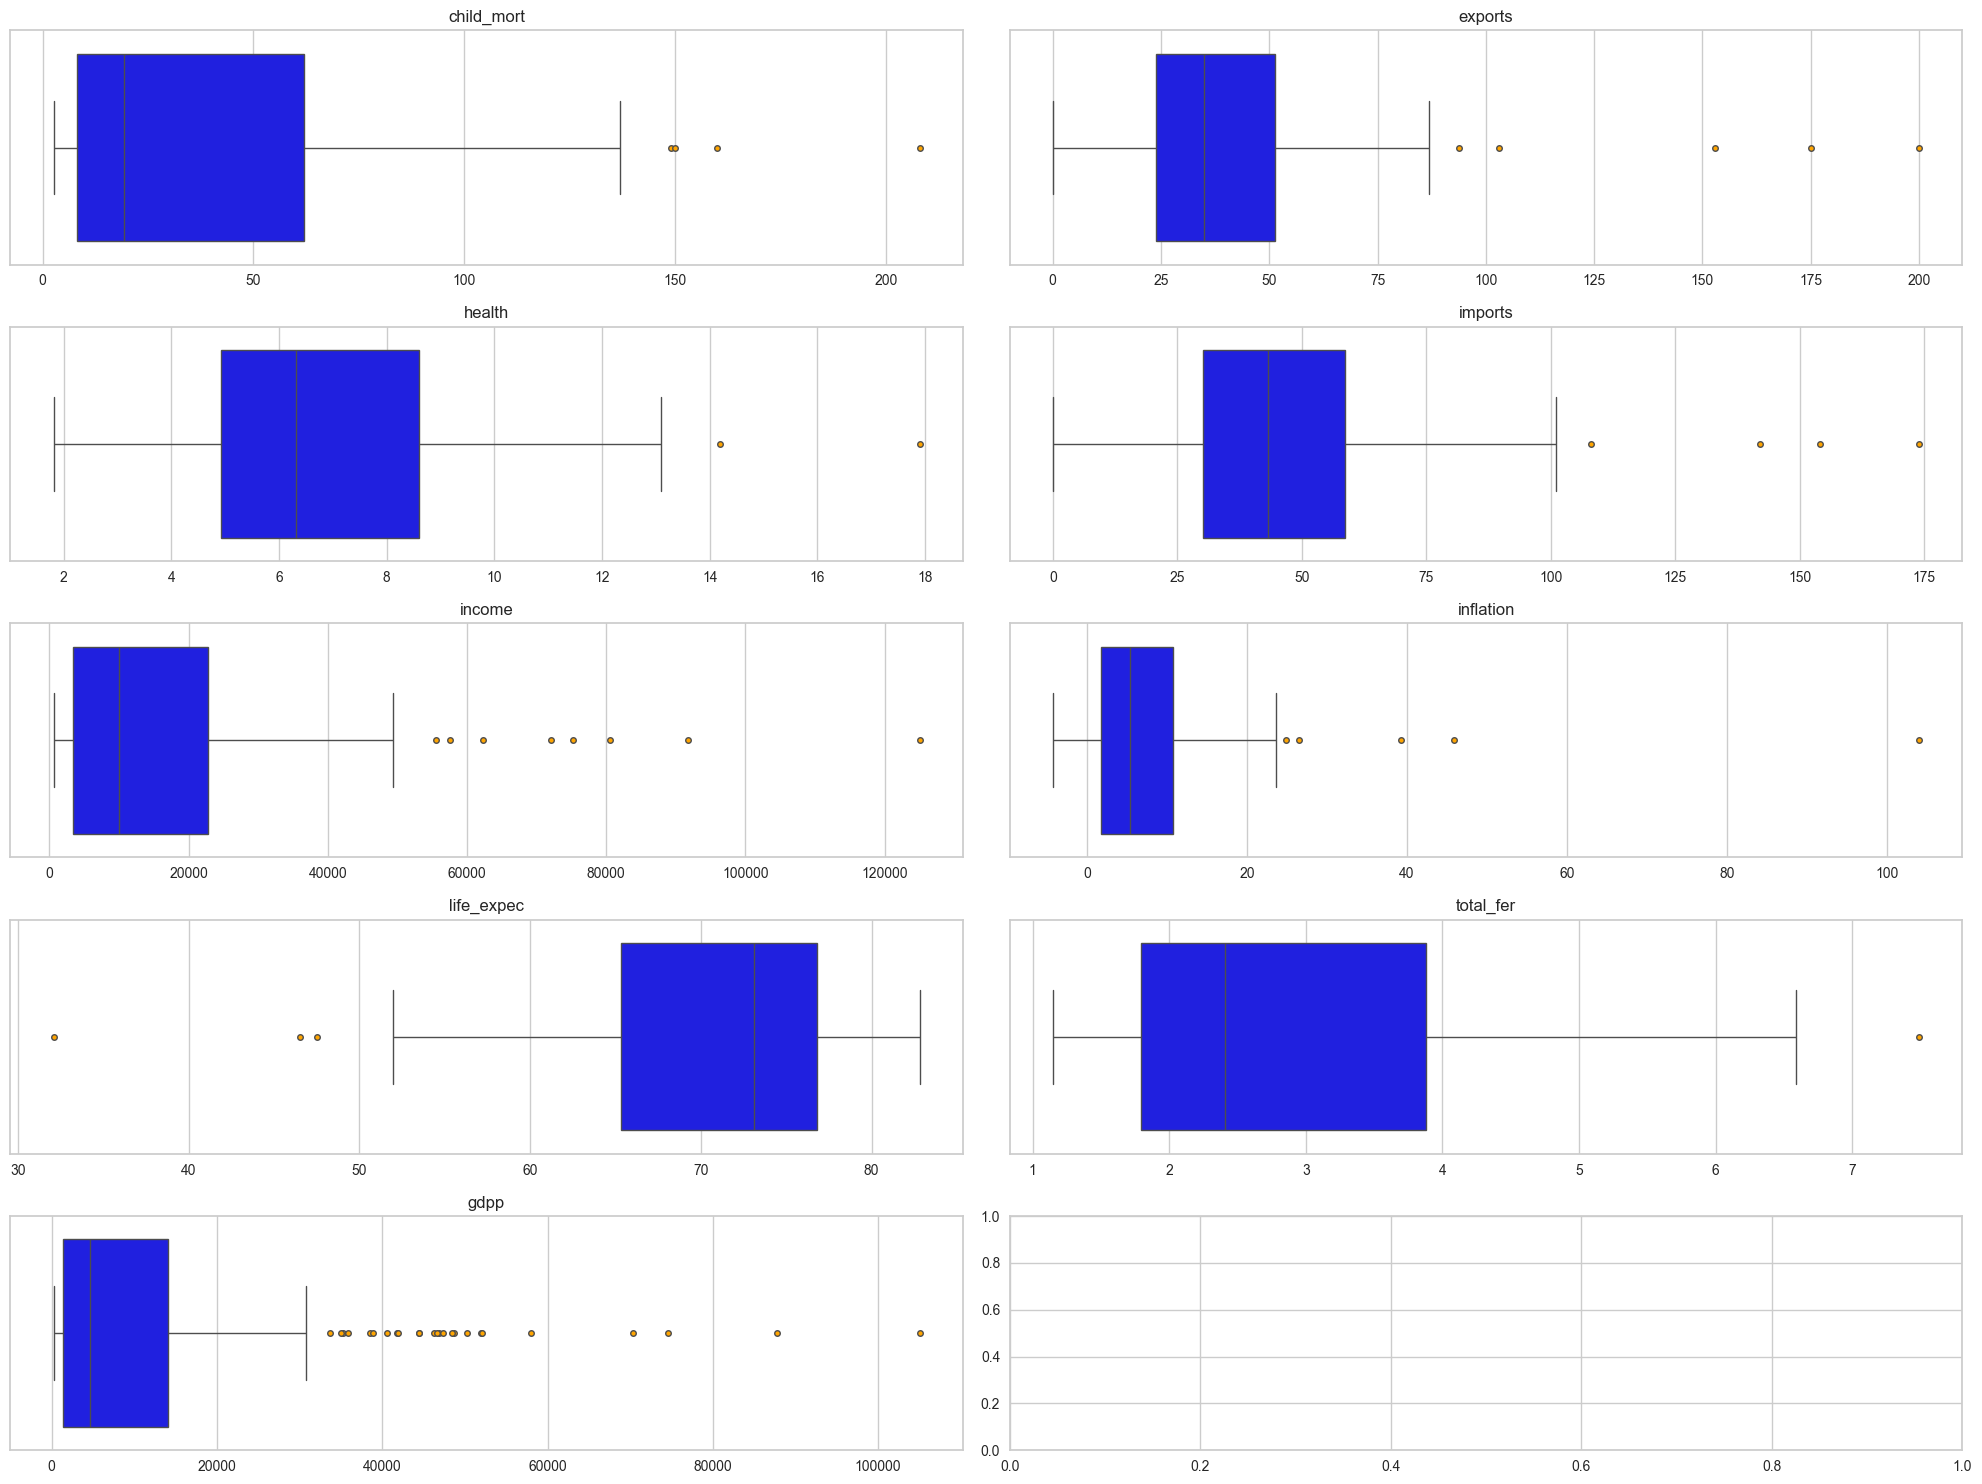

In [7]:
import src.soporte_outliers as so

gestor_outliers_univariados = so.GestionOutliersUnivariados(country)
gestor_outliers_univariados.visualizar_outliers_univariados()

In [8]:
resultado_univariados = gestor_outliers_univariados.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna CHILD_MORT es 4
La cantidad de outliers que tenemos para la columna EXPORTS es 5
La cantidad de outliers que tenemos para la columna HEALTH es 2
La cantidad de outliers que tenemos para la columna IMPORTS es 4
La cantidad de outliers que tenemos para la columna INCOME es 8
La cantidad de outliers que tenemos para la columna INFLATION es 5
La cantidad de outliers que tenemos para la columna LIFE_EXPEC es 3
La cantidad de outliers que tenemos para la columna TOTAL_FER es 1
La cantidad de outliers que tenemos para la columna GDPP es 25


In [9]:
gestor_outliers_multivariados = so.GestionOutliersMultivariados(country)
df_outliers = gestor_outliers_multivariados.detectar_outliers_if(contaminacion=0.01, n_estimators=1000)

In [10]:
df_outliers.replace({"outlier":{1:0,-1:1}}, inplace=True)

In [11]:
df_outliers[df_outliers["outlier"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,outlier
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1


In [12]:
df_outliers[["outlier"]].describe()

,outlier
count,167.000000
mean,0.011976
std,0.109105
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


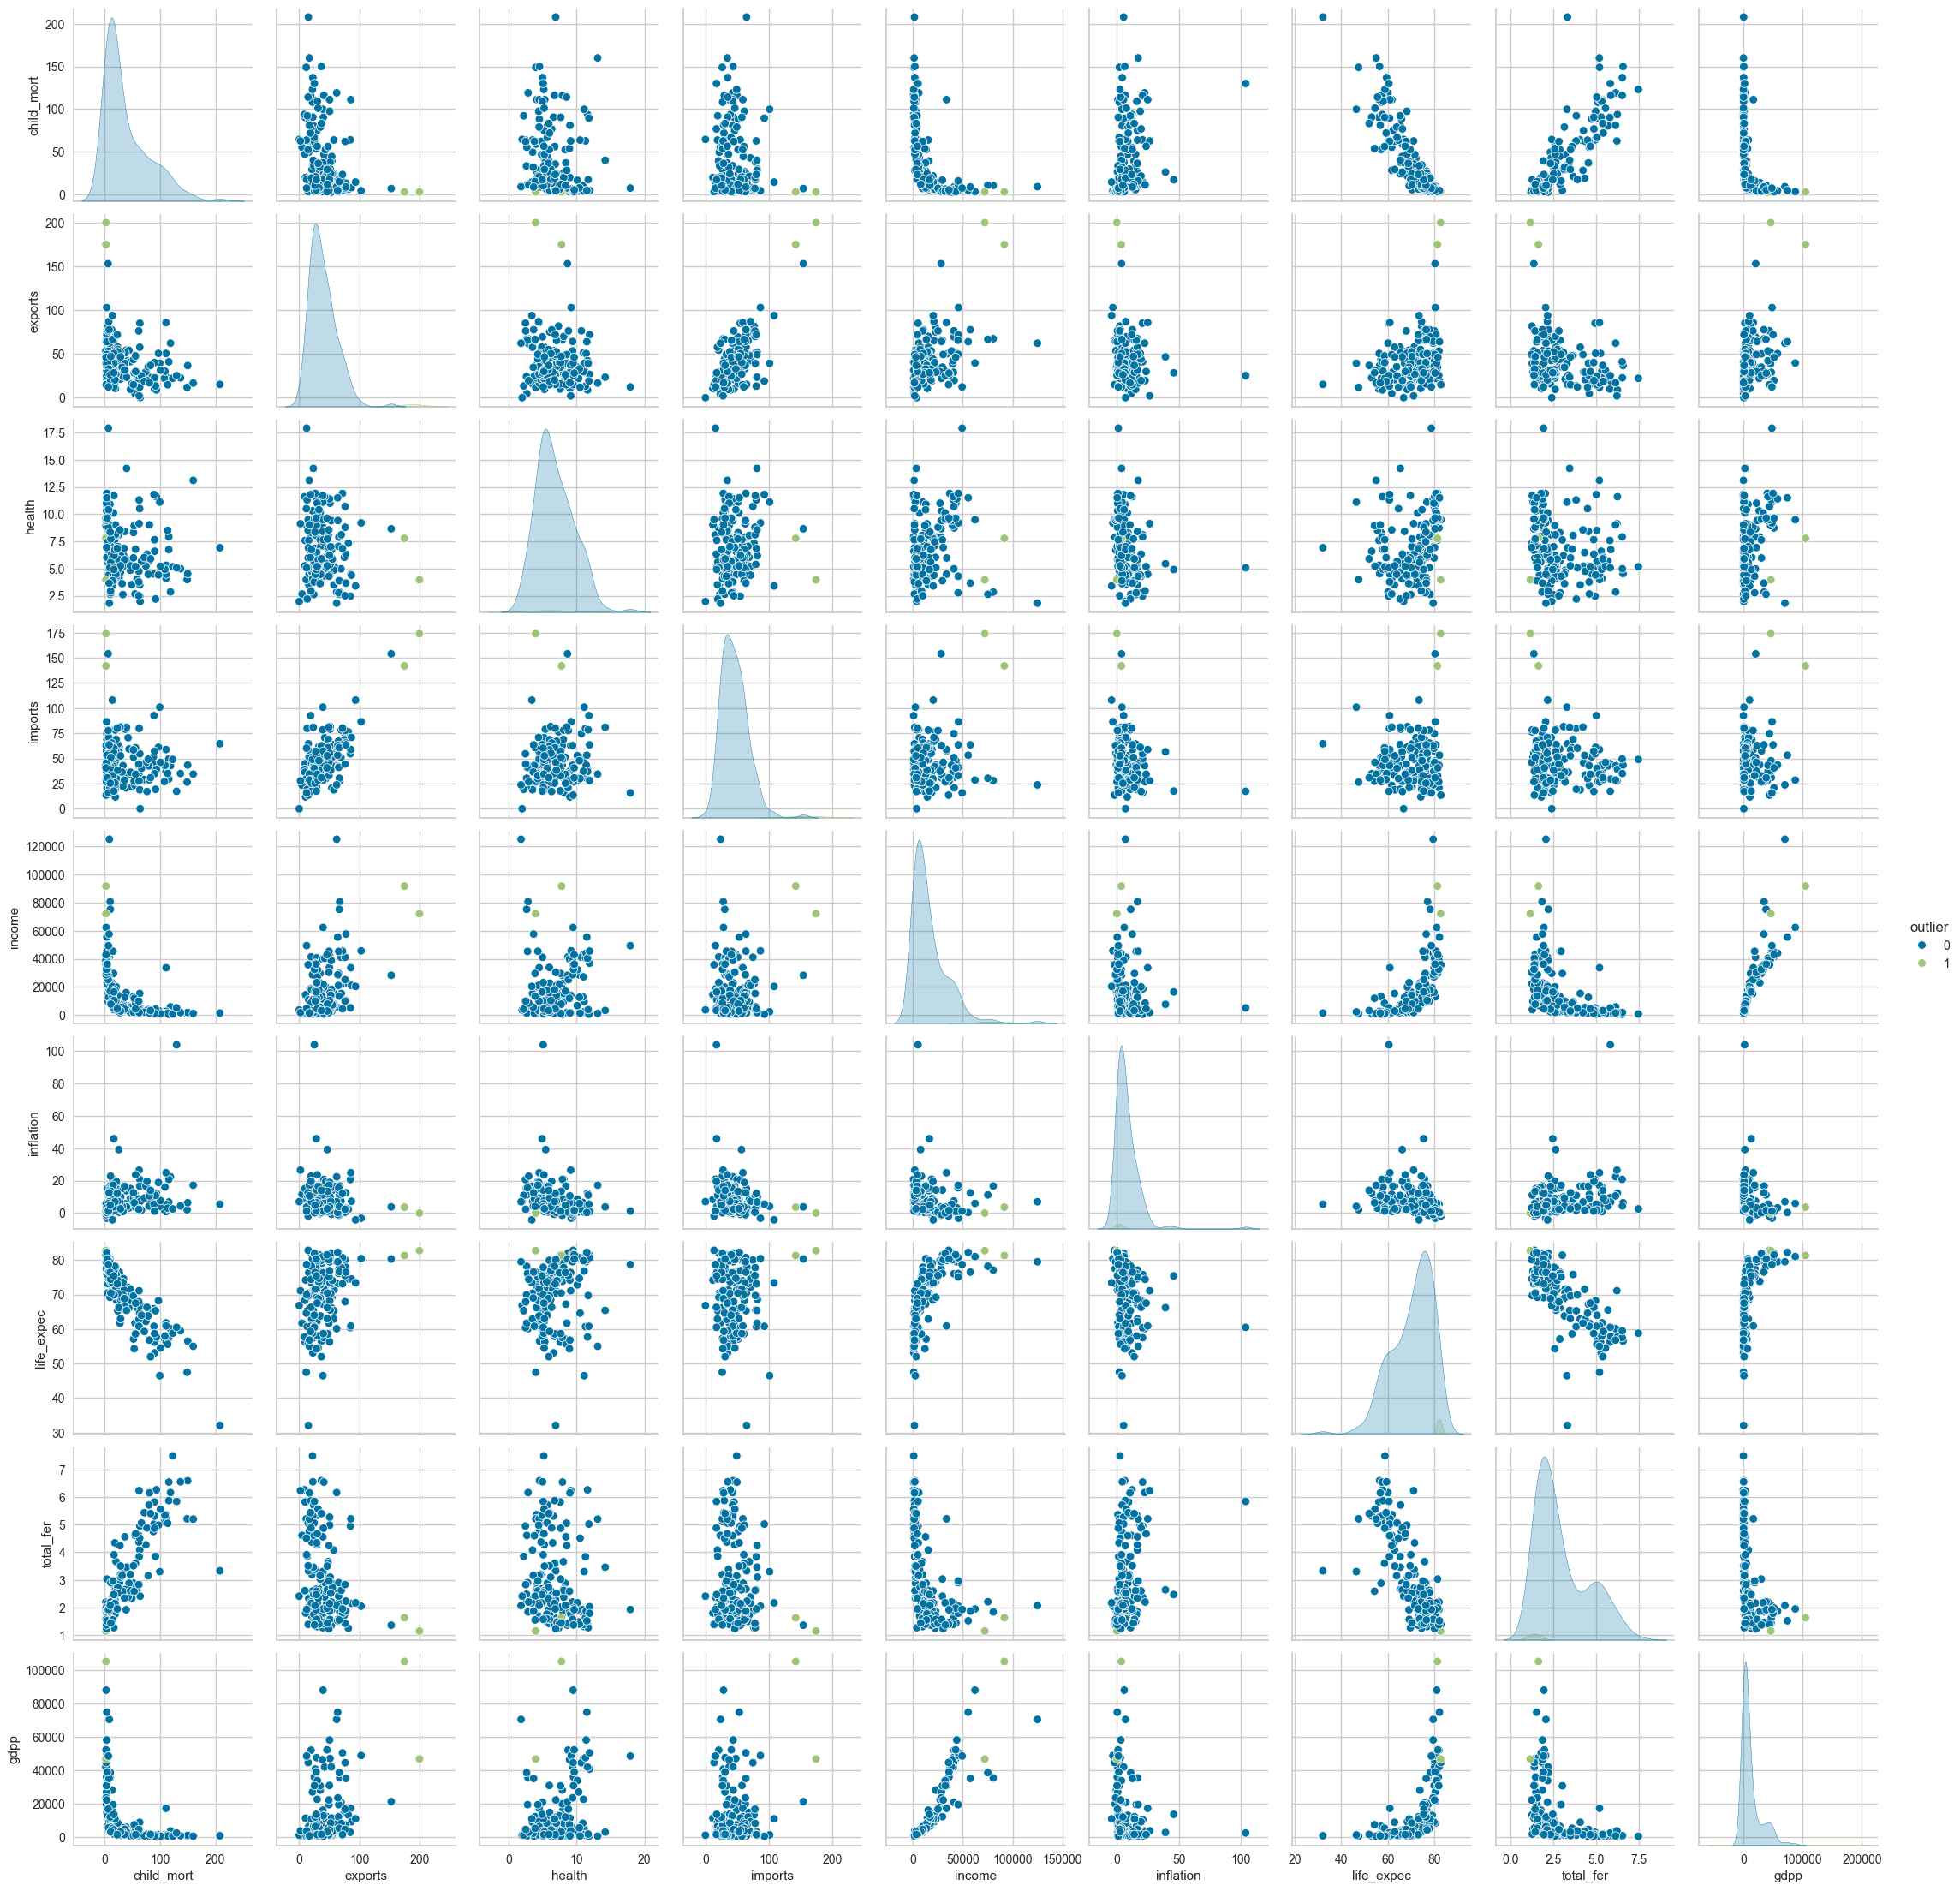

In [13]:
sns.pairplot(df_outliers, hue="outlier")

In [14]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [15]:
scaler = StandardScaler()

country_tranformed = scaler.fit_transform(country.drop(columns="country"))
country_tranformed

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

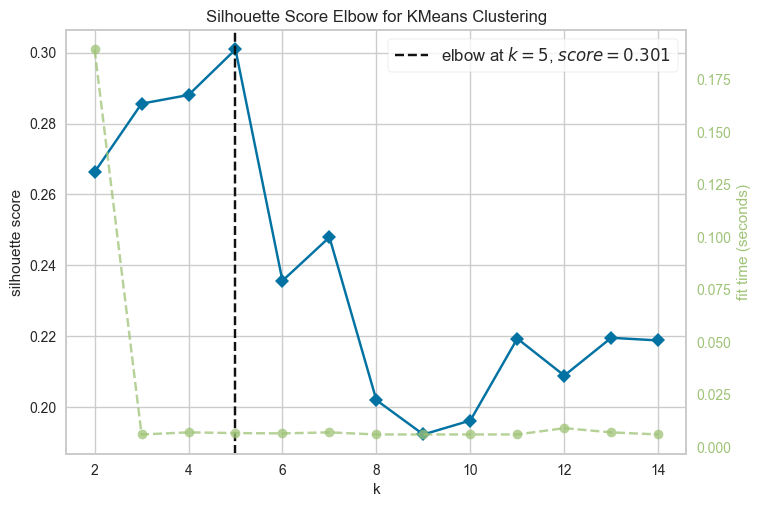

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
model = KMeans(random_state=42)

# fitted = model.fit_transform(country_tranformed)

visualizador = KElbowVisualizer(model, k=(2,15), metric="silhouette")

visualizador.fit(country_tranformed)
visualizador.show()

In [17]:
modelo_kmeans = KMeans(n_clusters=3)

km_fit = modelo_kmeans.fit(country_tranformed)
km_fit.labels_
kmeans = country.copy()
kmeans["cluster"] = km_fit.labels_

kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [18]:
# vamos a generar un mapa, para poder entender mejor los clusters y poder sacar conclusiones
fig = px.choropleth(kmeans,
                    locationmode = 'country names', # las ubicaciones se especifican por nombres de países.
                    locations = 'country', # la columna en df que contiene los nombres de los países.
                    color = kmeans['cluster'], # define el color de cada país según el cluster al que pertenece, usando la columna 'clusters' del DataFrame df.
                    color_discrete_map = { 1: "Red", # mapea los valores posibles de la columna 'clusters' a colores discretos en el mapa. 
                                          2: "Yellow",
                                          0: "Green"}      )

# ocultamos los detalles geográficos como fronteras y nombres de países
fig.update_geos(visible=False)

# configuramos la leyenda
fig.update_layout(legend_title_text = 'Cluster', # título de la leyenda que muestra los colores y sus correspondientes etiquetas de cluster.
                  legend_title_side = 'top') # posición de la leyenda

# ajustamos los márgenes del diseño del mapa para eliminar cualquier espacio adicional alrededor del gráfico.
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# mostramos el mapa
fig.show()

### Aglomerativo

Dendogramas

In [ ]:
for ax, metodo in zip(axes, metodos):